<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [2]:
%load_ext autoreload
%autoreload 2
import matplotlib.pyplot as plt
import matplotlib as mpl
import networkx as nx
import numpy as np
import pandas as pd
import pickle
import os
import re
import itertools as itr
from enm.visualize.visualize import plot_correlation_density, plot_vector, plot_lambda_collectivity
from enm.enm import Enm

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


/home/oma21/miniconda3/envs/enm/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
ba = nx.connected_watts_strogatz_graph(100, 4, 0.2)#nx.barabasi_albert_graph(1000,3)
enm_ba = Enm('ba')


In [4]:
enm_ba.G = ba

In [5]:
enm_ba.giant_component()

In [6]:
enm_ba.figure_path = '../reports/figures/random_for_pipeline/'

In [7]:
enm_ba.gnm_analysis()

@> 99 modes were calculated in 0.51s.
@> Calculating covariance matrix
@> Covariance matrix calculated in 0.0s.
@> Calculating perturbation response
@> Perturbation response matrix calculated in 0.0s.
@> Perturbation response scanning completed in 0.1s.


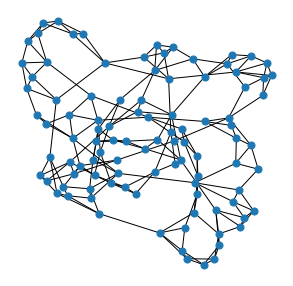

In [151]:
#with plt.xkcd():
fig, ax = plt.subplots(figsize=(5,5))
nx.draw(enm_ba.graph_gc,node_size=50, ax = ax )
fig.savefig(f"{enm_ba.figure_path}/network_plot.png",dpi=150,bbox_inches='tight')

#

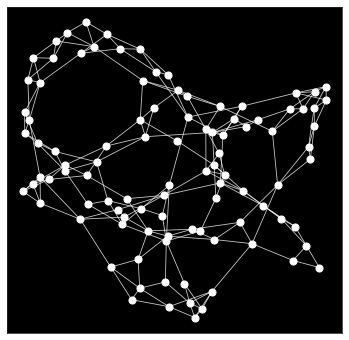

In [155]:
enm_ba.plot_network_spring(figsize=(6,6), node_size=50,edge_width=0.8,edge_alpha=0.8,dpi=150)

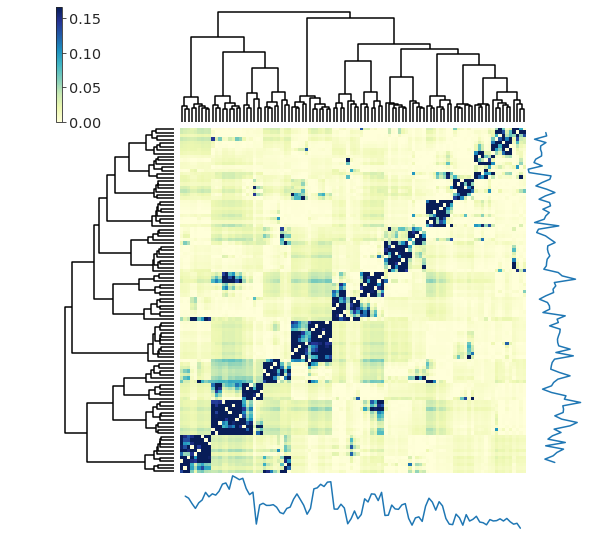

In [161]:
from enm.visualize.visualize import heatmap_annotated
rowdata, coldata = heatmap_annotated(enm_ba.prs_mat, enm_ba.figure_path)

In [10]:
enm_ba.get_prs(no_diag=False)

@> Calculating covariance matrix
@> Covariance matrix calculated in 0.0s.
@> Calculating perturbation response
@> Perturbation response matrix calculated in 0.0s.
@> Perturbation response scanning completed in 0.0s.


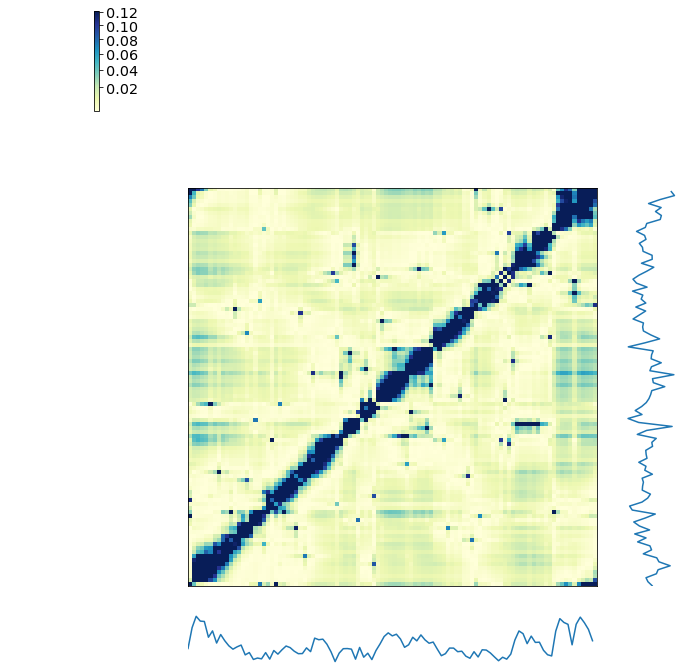

In [15]:
import copy
prs_mat = enm_ba.prs_mat
quantile_threshold =  0.95
#method = 'centroid'
q99 = np.quantile(prs_mat, quantile_threshold)
prs_mat_cl = copy.deepcopy(prs_mat)
prs_mat_cl[prs_mat_cl > q99] = q99
#colors_ = ['red' if i in sensors_pcc.orf_name.values else 'blue' if i in effector_pcc.orf_name.values else 'none' for i in e_pcc.nodes]
fig = plt.figure(figsize=(12, 12))
from matplotlib import gridspec, colors as clr
gs = gridspec.GridSpec(4,4, width_ratios=[1,.2,4,.5], height_ratios=[1,.2,4,.5])
ax_row_dend = fig.add_subplot(gs[2,0])
ax_col_dend = fig.add_subplot(gs[0,2])
ax_row_dend.set_axis_off()
ax_col_dend.set_axis_off()

# ax_row_colors = fig.add_subplot(gs[2,1])
# ax_col_colors = fig.add_subplot(gs[1,2])

ax_heatmap = fig.add_subplot(gs[2,2])

ax_row_data = fig.add_subplot(gs[2,3])
ax_row_data.set_axis_off()

ax_col_data = fig.add_subplot(gs[3,2])
ax_col_data.set_axis_off()

im = ax_heatmap.matshow(prs_mat_cl, aspect='auto',
                      origin='lower', cmap="YlGnBu",norm=clr.PowerNorm(gamma=0.8))


# xticks to the right (x-axis)
#ax_heatmap.set_xticks(range(40))
#ax_heatmap.set_xticklabels(idx1, minor=False)
ax_heatmap.xaxis.set_label_position('bottom')
ax_heatmap.xaxis.tick_bottom()

plt.xticks(rotation=-90, fontsize=8)  # ,colors='black')

# xticks to the right (y-axis)
#ax_heatmap.set_yticks(range(40))
#ax_heatmap.set_yticklabels(idx2, minor=False)
ax_heatmap.yaxis.set_label_position('right')
ax_heatmap.yaxis.tick_right()
#ax_heatmap.set_axis_off()

ax_heatmap.set_xticks([])
ax_heatmap.set_yticks([])
# to add the color bar
# axcolor = fig.add_axes([0.94, 0.1, 0.02, 0.6])
ax_colorbar = fig.add_subplot(gs[0, 0])
ax_colorbar.set_axis_off()
#ax_colorbar = fig.add_axes([0.0, 0.71, 0.1, .2])
row_data = np.mean(prs_mat, axis=1)
    # ,orientation=u'vertical')
ax_row_data.plot((row_data), range(len(row_data)), '-')
ax_row_data.set_ylim(0,len(row_data))

col_data = np.mean(prs_mat, axis=0)
    # ,orientation=u'vertical')
ax_col_data.plot(range(len(col_data)), col_data, '-')
ax_col_data.set_xlim(0,len(col_data))
#plt.axis('off')
#ax_col_data.axhline(np.quantile(col_data,0.99),c='orange',linestyle=':')
#ax_row_data.axvline(np.quantile(row_data,0.99),c='orange',linestyle=':')

cbar = plt.colorbar(im, ax=ax_colorbar)
#cbar.set_ticks([0,0.0002,0.0004])
plt.show()


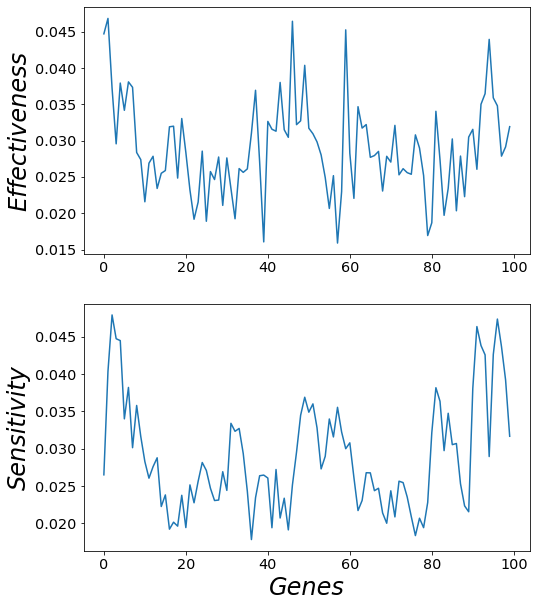

In [22]:
mpl.rc('text', usetex = False)

fig = plt.figure(figsize=(8,10))
#ax = fig.add_subplot(111)    # The big subplot
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)

# # Turn off axis lines and ticks of the big subplot
# ax.spines['top'].set_color('none')
# ax.spines['bottom'].set_color('none')
# ax.spines['left'].set_color('none')
# ax.spines['right'].set_color('none')
# ax.tick_params(labelcolor='w', top=False, bottom=False, left=False, right=False)


ax1.plot(np.flip(row_data))
ax2.plot(col_data)
ax.set_xlabel('Genes',fontstyle='italic')
ax1.set_ylabel('Effectiveness',fontstyle='italic')
ax2.set_ylabel('Sensitivity',fontstyle='italic')
ax2.xaxis.get_label().set_fontsize(24)
ax1.yaxis.get_label().set_fontsize(24)
ax2.yaxis.get_label().set_fontsize(24)
ax1.set_facecolor('white')
ax2.set_facecolor('white')
ax2.set_xlabel('Genes',fontstyle='italic')

plt.show()

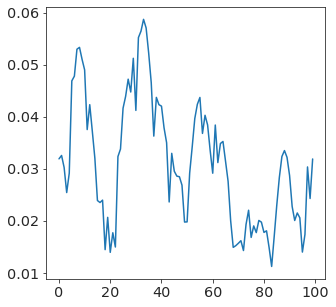

In [158]:
plt.plot(np.mean(enm_ba.prs_mat,axis=0))

In [145]:
enm_ba.plot_scatter('deg','sens')

No handles with labels found to put in legend.


In [114]:
enm_ba.df.corr(method='spearman')

,orf_name,deg,eig_0,eig_1,eig_2,eig_3,eig_4,eig_5,eig_6,eig_7,eff,sens,btw,trans,eigenvec_centr,closeness_centr,smallest_eigenvec
orf_name,1.000000,0.228654,-0.065875,-0.065659,-0.276592,0.162508,0.127561,0.178542,0.016670,0.087045,0.249469,0.251245,-0.015722,0.117016,0.325809,-0.139284,0.178542
deg,0.228654,1.000000,-0.068487,-0.130293,0.070783,0.067331,0.271146,-0.057627,-0.054919,0.098124,0.468137,-0.103680,0.414642,-0.299208,0.387745,0.198558,-0.057627
eig_0,-0.065875,-0.068487,1.000000,0.002760,-0.022310,0.012277,-0.009853,0.000024,-0.003768,-0.013189,0.047369,-0.046049,0.076328,-0.177531,0.008089,0.065742,0.000024
eig_1,-0.065659,-0.130293,0.002760,1.000000,-0.003216,0.019238,0.020078,-0.014209,-0.016730,-0.031899,-0.155140,0.110423,-0.259970,0.195524,-0.025755,-0.154149,-0.014209
eig_2,-0.276592,0.070783,-0.022310,-0.003216,1.000000,0.041836,0.015662,-0.095974,-0.030951,-0.017354,0.243168,0.178014,-0.041584,-0.035625,-0.121752,-0.063023,-0.095974
eig_3,0.162508,0.067331,0.012277,0.019238,0.041836,1.000000,0.013813,-0.003432,-0.018782,-0.002952,0.085497,-0.130489,0.153207,-0.191379,0.129481,0.277321,-0.003432
eig_4,0.127561,0.271146,-0.009853,0.020078,0.015662,0.013813,1.000000,0.012637,-0.033339,0.024578,0.052865,0.042904,-0.074347,0.247616,0.203216,-0.090268,0.012637
eig_5,0.178542,-0.057627,0.000024,-0.014209,-0.095974,-0.003432,0.012637,1.000000,0.007285,-0.006301,-0.079280,0.161944,0.116904,0.154069,-0.634563,-0.203508,1.000000
eig_6,0.016670,-0.054919,-0.003768,-0.016730,-0.030951,-0.018782,-0.033339,0.007285,1.000000,-0.028275,-0.022610,-0.029043,0.070423,-0.060104,-0.004296,0.011870,0.007285
eig_7,0.087045,0.098124,-0.013189,-0.031899,-0.017354,-0.002952,0.024578,-0.006301,-0.028275,1.000000,-0.023654,0.068575,-0.113027,0.205427,0.069271,-0.063377,-0.006301
